# Welcome:

In this notebook we are going to apply methods of some earthquake based library called Obspy to SCG signals. 

### Imports:

In [1]:
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import obspy

After you have downloaded your dataset you should change the **dir_path** to the path of your directory which contains your data. You can download your data from data section. The dataset we will use is named diseased dataset. You can directly use .npy files that ı have extracted for you.

In [2]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset"

In [3]:
x = np.load(dir_path + "/SCG_x.npy", allow_pickle= True)
y = np.load(dir_path + "/SCG_z.npy", allow_pickle= True)
z = np.load(dir_path + "/SCG_y.npy", allow_pickle= True)

#### lets check our signals

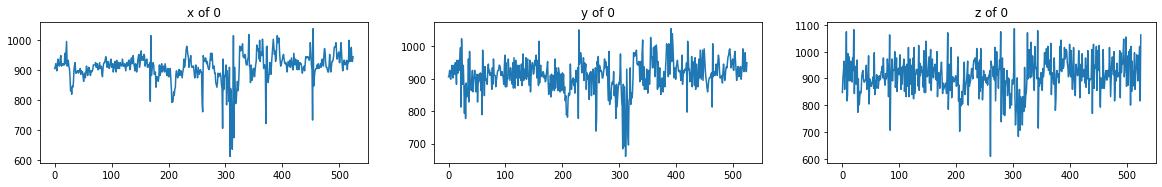

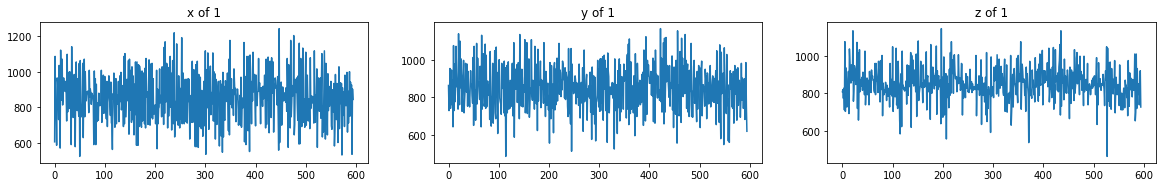

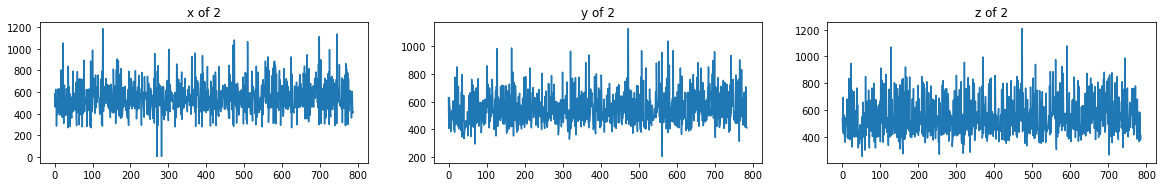

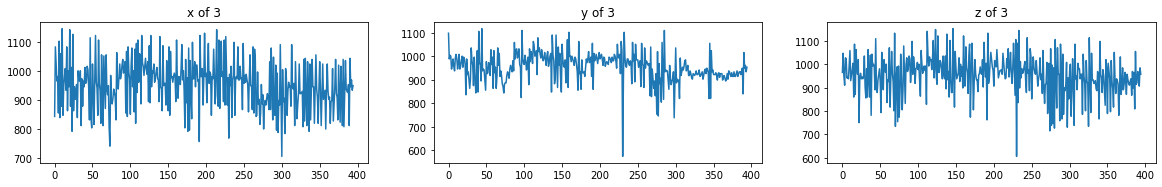

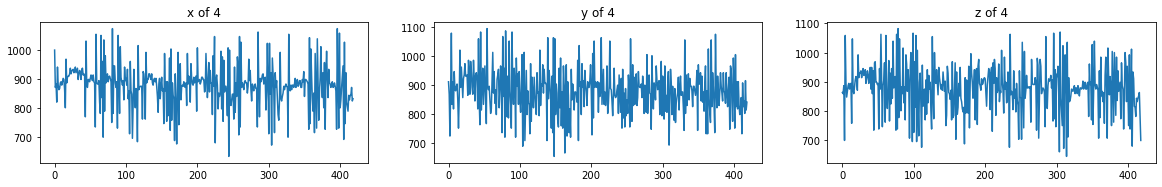

In [4]:
for i in range(5):
    fig = plt.figure(figsize=(20, 15))
  
    rows = 5
    columns = 3

    if i == 0:
        fig.add_subplot(rows, columns, i+1)
        plt.plot(x[i])
        plt.title("x of {}".format(i))

        fig.add_subplot(rows, columns, i+2 )
        plt.plot(y[i])
        plt.title("y of {}".format(i))

        fig.add_subplot(rows, columns, i+3)
        plt.plot(z[i])
        plt.title("z of {}".format(i))
        
    else:
        fig.add_subplot(rows, columns, 1)
        plt.plot(x[i])
        plt.title("x of {}".format(i))

        fig.add_subplot(rows, columns, 2 )
        plt.plot(y[i])
        plt.title("y of {}".format(i))

        fig.add_subplot(rows, columns, 3)
        plt.plot(z[i])
        plt.title("z of {}".format(i))
    plt.show()

#### lets check the  plots of the x, y, z components of the waveform that we are going to work on this notebook.

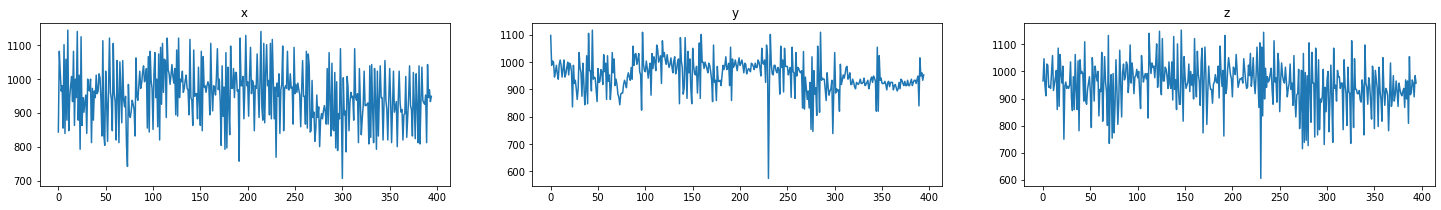

In [5]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3 

fig.add_subplot(rows, columns, 1)
plt.plot(x[3])
plt.title(" x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(y[3])
plt.title("y ")

fig.add_subplot(rows, columns, 3)
plt.plot(z[3])
plt.title("z ")

plt.show()

## seismology library  techniques on specific scg signal

### create trace object

In [6]:
tr_x = obspy.core.trace.Trace(x[3]).detrend("linear").taper(max_percentage=0.05, type="hann")
tr_y = obspy.core.trace.Trace(y[3]).detrend("linear").taper(max_percentage=0.05, type="hann")
tr_z = obspy.core.trace.Trace(z[3]).detrend("linear").taper(max_percentage=0.05, type="hann")

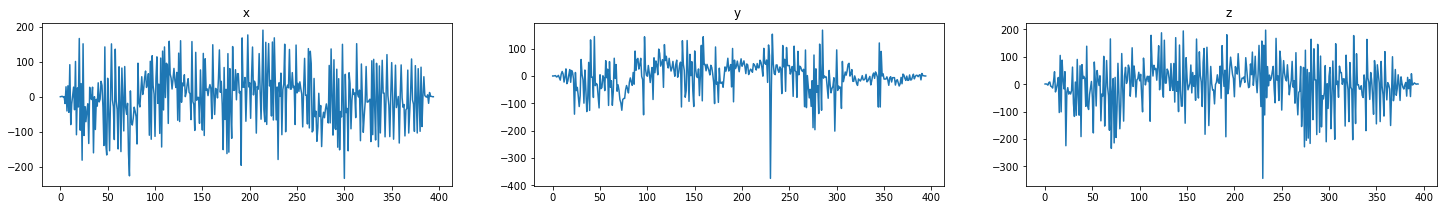

In [7]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3 

fig.add_subplot(rows, columns, 1)
plt.plot(tr_x)
plt.title(" x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(tr_y)
plt.title("y ")

fig.add_subplot(rows, columns, 3)
plt.plot(tr_z)
plt.title("z ")

plt.show()

#### compare trace and original signal

Now since we convert our data from numpy array to obspy trace object we need to be sure that signal remained the same after the conversion. 

To check that we are going to use np.correlate. It outputs the cross-correlation of two 1-dimensional sequences.

In [8]:
r = np.correlate(x[3], tr_x, mode='full')
print(x[3].shape, tr_x.data.shape)

(395,) (395,)


This will return a comb function with a maximum when both data sets are overlapping. As this is an autocorrelation there will be no "lag" between the two input signals. The maximum of the correlation is therefore vector.size-1.

In [9]:
np.argmax(r)

394

(0.0, 400.0)

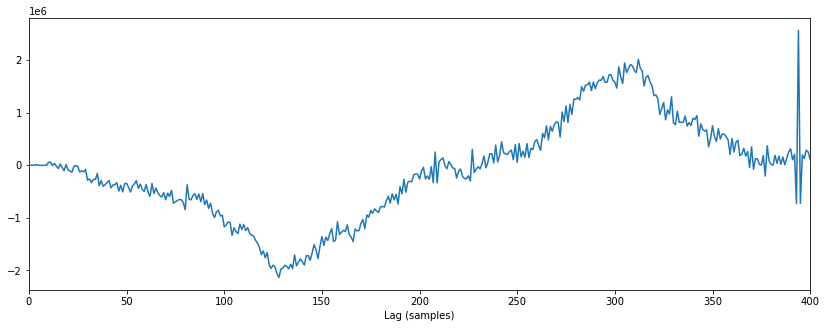

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(r)
plt.xlabel('Lag (samples)')
plt.xlim(0, 400)

#### stats of trace object

In [11]:
tr_x.stats

         network: 
         station: 
        location: 
         channel: 
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:06:34.000000Z
   sampling_rate: 1.0
           delta: 1.0
            npts: 395
           calib: 1.0
      processing: ["ObsPy 1.3.0: detrend(options={}::type='linear')", "ObsPy 1.3.0: taper(max_length=None::max_percentage=0.05::side='both'::type='hann')"]

### Filtering

Now we will try different filtering tecniques.

#### highpassed:

It is a filter that passes signals with a frequency higher than a certain cutoff frequency and attenuates 
signals with frequencies lower than the cutoff frequency.

In [12]:
highpassed_x = tr_x.copy().filter("highpass", freq = 0.45, corners = 2, zerophase = True)
highpassed_y = tr_y.copy().filter("highpass", freq = 0.45, corners = 2, zerophase = True)
highpassed_z = tr_z.copy().filter("highpass", freq = 0.45, corners = 2, zerophase = True)

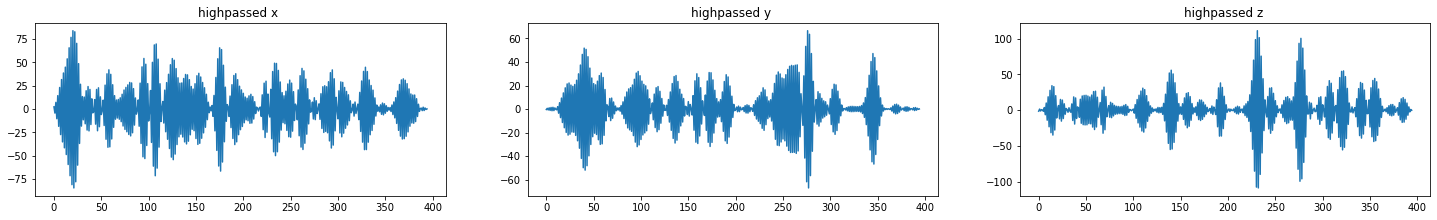

In [13]:
fig = plt.figure(figsize=(25, 7))
rows = 2
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(highpassed_x)
plt.title("highpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(highpassed_y)
plt.title("highpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(highpassed_z)
plt.title("highpassed z ")
plt.show()


### 

#### bandpassed:
bandpass filter (BPF) is a filter that passes frequencies within a certain range and rejects frequencies outside that range.


In [14]:
bandpassed_x = tr_x.copy().filter("bandpass", freqmin = .05, freqmax = 0.1, corners = 2, zerophase = True)
bandpassed_y = tr_y.copy().filter("bandpass", freqmin = .05, freqmax = 0.1, corners = 2, zerophase = True)
bandpassed_z = tr_z.copy().filter("bandpass", freqmin = .05, freqmax = 0.1, corners = 2, zerophase = True)

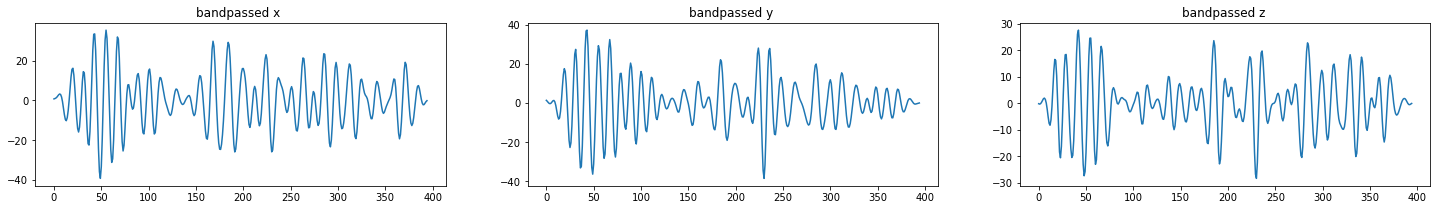

In [15]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(bandpassed_x)
plt.title("bandpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(bandpassed_y)
plt.title("bandpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(bandpassed_z)
plt.title("bandpassed z ")
plt.show()

#### lowpassed:
low-pass filter is a filter that passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.

In [16]:
lowpassed_x = tr_x.copy().filter("lowpass", freq = 0.06, corners = 2, zerophase = True)
lowpassed_y = tr_y.copy().filter("lowpass", freq = 0.06, corners = 2, zerophase = True)
lowpassed_z = tr_z.copy().filter("lowpass", freq = 0.06, corners = 2, zerophase = True)

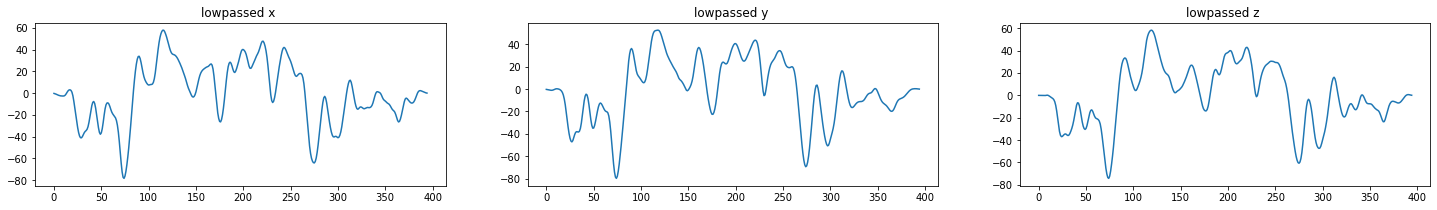

In [17]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(lowpassed_x)
plt.title("lowpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(lowpassed_y)
plt.title("lowpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(lowpassed_z)
plt.title("lowpassed z ")
plt.show()

### Lta-Sta

STA/LTA algorithm is a commonly used triggering algorithm. Main idea behind is trying to catch sudden increase in signals. One way to catch those sudden increases in signal is tracking ﬂuctuations of the signal in both short-term and long-term.

* Generally, STA duration must be longer than a few periods (zero-crossings of the main frequency) of a typically expected seismic signal. On the other hand, STA duration must be shorter than the shortest events (trigger on/off, the envelope duration) we expect to capture.
* STA duration must be longer than the inverse frequency of noisy spikes. Otherwise, false alarms will be captured.
* The LTA window should be longer than a few ‘periods’ of typically irregular (slow) seismic noise fluctuations. Typically, it’s an order of magnitude larger than the STA duration.


**selection of short time average window duration**

To some extent the STA functions as a signal filter. 
* The shorter the duration selected, the higher the trigger’s sensitivity to short lasting local earthquakes compared to long lasting and lower frequency distant earthquakes. 
* The longer the STA duration selected, the less sensitive it is for short local earthquakes. Therefore, by changing the STA duration one can, to some extent, prioritize capturing of distant or local events.
* For regional events, a typical value of STA duration is between 1 and 2 sec. For local earth- quakes shorter values around 0.5 to 0.3 s are commonly used in practice.

**selection of long-time average window duration (NLTA)**

* The LTA window measures average amplitude seismic noise. 
* It should last longer than a few ’periods’ of typically irregular seismic noise fluctuations. 
* By changing the LTA window duration, one can make the recording more or less sensitive to regional events in the ’Pn’- wave2 range from about 200 to 1500 km epicentral distance.
* These events typically have the low amplitude emergent Pn- waves as the first onset. A short LTA duration allows the LTA value more or less to adjust to the slowly increasing amplitude of emergent seismic waves. Thus the STA/LTA ratio remains low in spite of increasing STA (nominator and denominator of the ratio increase). This effectively diminishes trigger sensitivity to such events. 
* In the opposite case, using a long LTA window duration, trigger sensitivity to the emergent earthquakes is increased because the LTA value is not so rapidly influenced by the emergent seismic signal, allowing Lg3 or Sg4 waves to trigger the recording.


In [18]:
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, z_detect, carl_sta_trig,  delayed_sta_lta
from obspy.signal.trigger import plot_trigger

In [19]:
df = tr_x.stats.sampling_rate

#### different lta-sta approaches on  tr_x

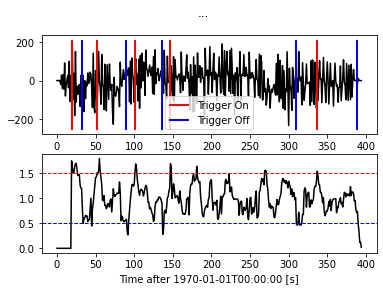

In [20]:
cft_x_c = classic_sta_lta(tr_x.copy(), int(10* df), int(20 * df))
plot_trigger(tr_x, cft_x_c, 1.5, 0.5)

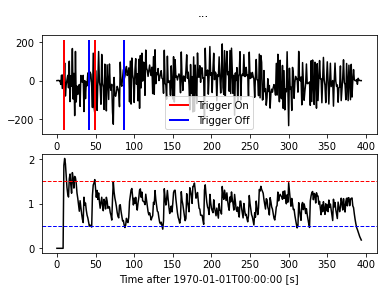

In [21]:
cft_x_r = recursive_sta_lta(tr_x.copy(), int(4 * df), int(9 * df))
plot_trigger(tr_x, cft_x_r, 1.5, 0.5)

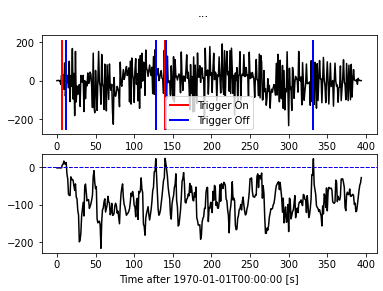

In [22]:
cft_x_cst = carl_sta_trig(tr_x.copy(), int(4 * df), int(7 * df), 2, 1)
plot_trigger(tr_x, cft_x_cst, 1.5, 0.5)

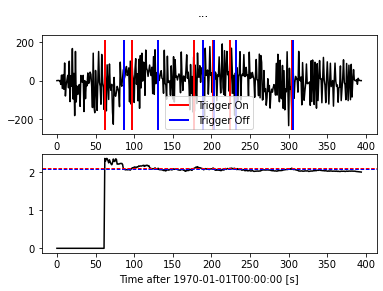

In [23]:
cft_x_d= delayed_sta_lta(tr_x.copy(), int(4 * df), int(8* df))
plot_trigger(tr_x, cft_x_d, 2.1, 2.07)

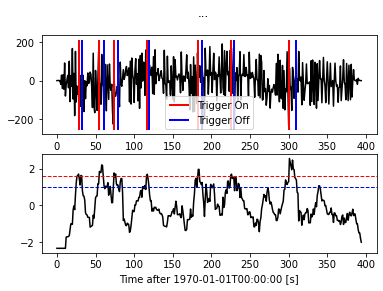

In [24]:
cft_x_z = z_detect(tr_x.data.copy(), int(12 * df))
plot_trigger(tr_x, cft_x_z, 1.6, 1.0)

#### classical lta-sta on y and z

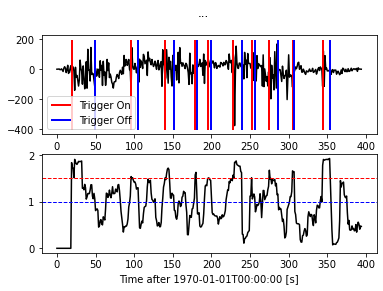

In [25]:
cft_y = classic_sta_lta(tr_y, int(10 * df), int(20 * df))
plot_trigger(tr_y, cft_y, 1.5, 1.0)

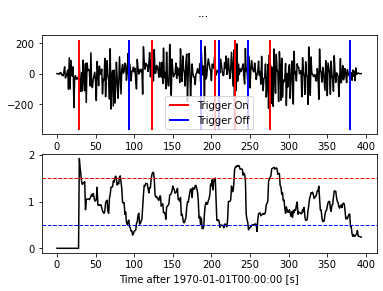

In [26]:
cft_z = classic_sta_lta(tr_z, int(5 * 3), int(10 * 3))
plot_trigger(tr_z, cft_z, 1.5, 0.5)

### spectrogram

**What is a spectrogram?**

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.  Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.  

In the seismic world, spectrograms are increasingly being used to look at frequency content of continuous signals recorded by individual or groups of seismometers to help distinguish and characterize **different types of earthquakes or other vibrations** in the earth. 

Belki hastalık tipini ayırmak içn spectrogram kullanılabilir ?

In [27]:
tr_x_slice = tr_x.slice(starttime = tr_x.stats.starttime, endtime = tr_x.stats.starttime+395)

Window length for fft in seconds. If this parameter is too small, the calculation will take forever. If None, it defaults to (samp_rate/100.0).

SOR : wlen i nasıl seçmeliyim. bu tam olarak scg'de neye denk geliyor?

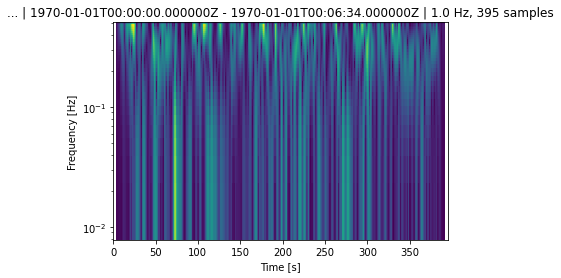

In [28]:
tr_x_slice.spectrogram(log=True, wlen=10)

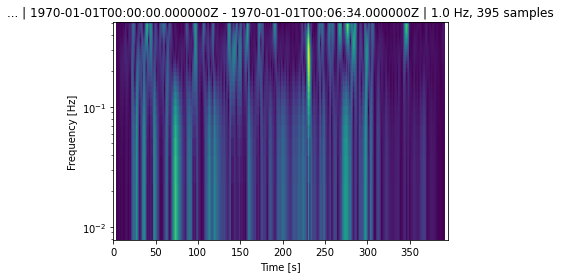

In [29]:
tr_y_slice = tr_y.slice(starttime = tr_y.stats.starttime, endtime = tr_y.stats.starttime+395)
tr_y_slice.spectrogram(log=True, wlen=10)

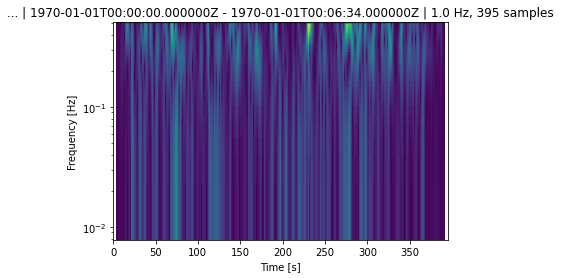

In [30]:
tr_z_slice = tr_z.slice(starttime = tr_z.stats.starttime, endtime = tr_z.stats.starttime+395)
tr_z_slice.spectrogram(log=True, wlen= 10)

### all plots 

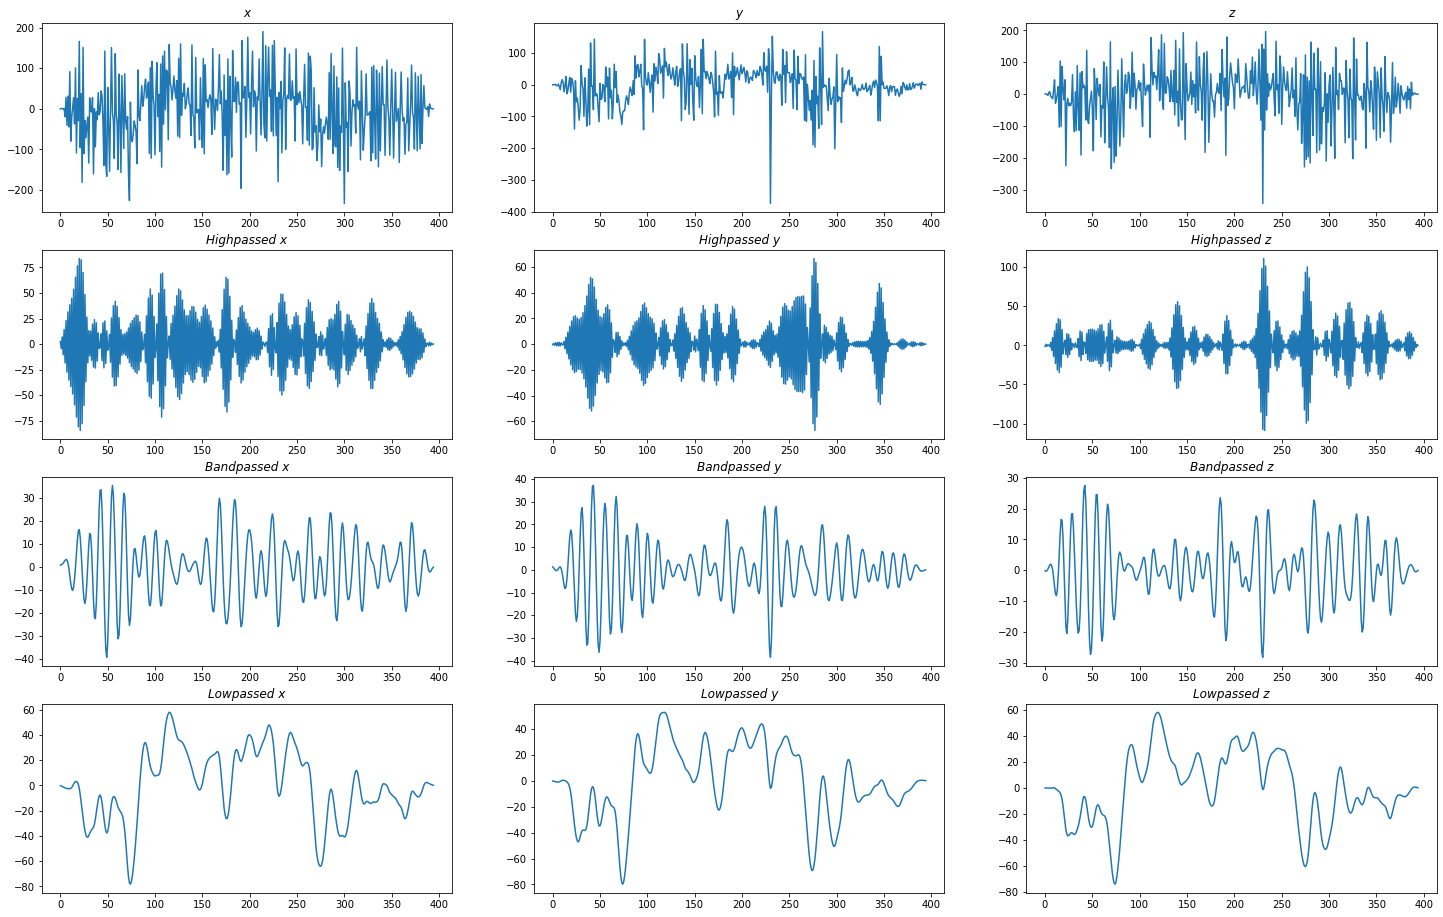

In [31]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(4, 3)

pl.figure(figsize=(25, 16))
ax = pl.subplot(gs[0, 0]).set_title('x', fontstyle='italic')
pl.plot(tr_x)

ax = pl.subplot(gs[0, 1]).set_title('y', fontstyle='italic')
pl.plot(tr_y)

ax = pl.subplot(gs[0,2]).set_title('z', fontstyle='italic')
pl.plot(tr_z)

ax = pl.subplot(gs[1, 0]).set_title('Highpassed x', fontstyle='italic')
pl.plot(highpassed_x)

ax = pl.subplot(gs[1, 1]).set_title('Highpassed y', fontstyle='italic') 
pl.plot(highpassed_y)

ax = pl.subplot(gs[1,2]).set_title('Highpassed z', fontstyle='italic')
pl.plot(highpassed_z)

ax = pl.subplot(gs[2, 0]).set_title('Bandpassed x', fontstyle='italic') 
pl.plot(bandpassed_x)

ax = pl.subplot(gs[2, 1]).set_title('Bandpassed y', fontstyle='italic') 
pl.plot(bandpassed_y)

ax = pl.subplot(gs[2,2]).set_title('Bandpassed z', fontstyle='italic') 
pl.plot(bandpassed_z)

ax = pl.subplot(gs[3, 0]).set_title('Lowpassed x', fontstyle='italic') 
pl.plot(lowpassed_x)

ax = pl.subplot(gs[3, 1]).set_title('Lowpassed y', fontstyle='italic') 
pl.plot(lowpassed_y)

ax = pl.subplot(gs[3,2]).set_title('Lowpassed z', fontstyle='italic') 
pl.plot(lowpassed_z)

plt.show()